In [1]:
import pandas as pd

In [2]:
%matplotlib inline 

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

# Overview

Each row represents a home sale.

We try to predict both home sales, and types of sales.

When `audantic_target`=1, this is the type of transaction we are trying to predict.

```
'audantic_target': 1 or 0, if we are trying to predict

'pid': property id
'did': sales document id
'fips': county id
'zipcode': zipcode
'sfr': bool for is single family home

-- house details
'square_footage': 
'year_built'
'equity'
'estimated_value'
'tax_assessed_value'
'length_of_ownership'

-- owner details
'est_household_income_val': estimated income
'mosaic_hh_val': demographic variable for home
'mosaic_zip4_val': demographic variable for neighborhood
'mosaic_diff': difference between home and neighborhood demographics

-- sale descriptors
'sale_amount': home sale price
'seller_name'
'buyer_name'
'seller_occupied': if seller lived in the house
'document_type'
'distress_circumstance'
'transfer_type'
```

In [4]:
# Objective



## read in the data

In [5]:
df = pd.read_csv('targets_IL.csv')

In [6]:
print(df.columns.values)

['pid' 'did' 'fips' 'zipcode' 'sfr' 'seller_occupied' 'square_footage'
 'year_built' 'equity' 'estimated_value' 'tax_assessed_value' 'seller_name'
 'buyer_name' 'document_type' 'distress_circumstance' 'transfer_type'
 'length_of_ownership' 'sale_amount' 'est_household_income_val'
 'mosaic_hh_val' 'mosaic_zip4_val' 'mosaic_diff' 'anti_distress'
 'anti_fake_deal' 'anti_short_sale' 'anti_bad_name' 'anti_sqft'
 'anti_yearbuilt' 'anti_est_value' 'audantic_target']


## column groupings

In [7]:
info_cols = ['pid']

In [8]:
groupby_cols = [
    'document_type', 
    'distress_circumstance', 
    'transfer_type'
]

In [9]:
geography_cols = ['zipcode', 'fips']

In [10]:
describe_cols = [
    'square_footage',
    'year_built',
    'equity',
    'estimated_value',
    'tax_assessed_value',
    'length_of_ownership',
    'sale_amount',
    'est_household_income_val',
    'mosaic_hh_val',
    'mosaic_zip4_val',
    'mosaic_diff',
    'seller_occupied'
]

In [11]:
anti_cols = [
    'anti_distress',
    'anti_fake_deal',
    'anti_short_sale',
    'anti_bad_name',
    'anti_sqft',
    'anti_yearbuilt',
    'anti_est_value'
]

In [12]:
output_cols = ['audantic_target']

# Descriptive Statistics (data structure / missing data)

In [13]:
df[describe_cols].describe().round(1)

,square_footage,year_built,equity,estimated_value,tax_assessed_value,length_of_ownership,sale_amount,est_household_income_val,mosaic_hh_val,mosaic_zip4_val,mosaic_diff,seller_occupied
count,75049.0,75049.0,75049.0,75049.0,3308.0,49672.0,75049.0,75049.0,75049.0,75049.0,75049.0,75049.0
mean,1587.0,1949.8,66118.5,305105.0,24077.4,6.7,289160.5,66138.3,37.4,30.6,-6.9,0.6
std,775.7,65.4,109305.9,237613.9,21297.8,5.8,256123.2,70083.2,25.2,22.5,19.6,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,1.0,1.0,-71.0,0.0
25%,1086.0,1934.0,0.0,162000.0,11905.5,1.2,136500.0,7500.0,16.0,16.0,-8.0,0.0
50%,1329.0,1955.0,27355.0,241000.0,18369.0,5.0,226000.0,62500.0,31.0,25.0,0.0,1.0
75%,1840.0,1967.0,88310.0,357000.0,28262.2,11.6,350000.0,87500.0,69.0,38.0,0.0,1.0
max,11024.0,2016.0,1854000.0,2879000.0,266793.0,32.5,1996500.0,300000.0,72.0,72.0,60.0,1.0


### The summary statistics above (specifically row count) help point out missing data: 'tax_assessed_value' is missing data for 95% of rows, 'length_of_ownership' is missing data for over 33% of rows

In [14]:
df[info_cols + describe_cols + groupby_cols].head(10)

,pid,square_footage,year_built,equity,estimated_value,tax_assessed_value,length_of_ownership,sale_amount,est_household_income_val,mosaic_hh_val,mosaic_zip4_val,mosaic_diff,seller_occupied,document_type,distress_circumstance,transfer_type
0,38964962,1120,1891,0,321000,NaN,10.3929,137000,0,72,72,0,0,Warranty Deed,NaN,Transfer
1,18209234,1558,1927,161000,316000,NaN,NaN,135000,0,72,72,0,0,Grant Deed,NaN,Transfer
2,174716703,1316,1966,87000,287000,NaN,0.4983,116000,0,72,72,0,0,Grant Deed,NaN,Transfer
3,175197034,1617,1952,0,151000,NaN,15.4853,180000,0,72,72,0,0,Grant Deed,NaN,Transfer
4,175197035,1617,1952,0,151000,NaN,NaN,180000,0,72,72,0,0,Grant Deed,NaN,Transfer
5,25809070,874,1947,13020,132000,NaN,1.6454,173000,0,72,72,0,0,Warranty Deed,NaN,Transfer
6,38906192,1785,1955,168000,466000,NaN,1.6646,367500,0,72,19,-53,0,Grant Deed,NaN,Transfer
7,11244467,1017,1941,0,214000,NaN,1.0157,176599,0,72,11,-61,0,Grant Deed,Sale Record - REO Liquidation,Transfer
8,144072809,980,1961,0,141000,NaN,0.5613,63000,0,72,72,0,0,Grant Deed,Sale Record - REO Liquidation,Transfer
9,149637709,1248,1968,27243,203000,NaN,0.9227,179000,30000,31,16,-15,0,Grant Deed,Sale Record - REO Liquidation,Transfer


### Previewing the first 10 rows helps point out other missing data (where the value is 0 instead of NaN) for column 'est_household_income_val'

In [15]:
df[df['est_household_income_val']==0].count().filter(items=['pid'])

pid    18066
dtype: int64

### Approximately 25% of values in column 'est_household_income_val' are missing (they are 0 which I'm assuming is a placeholder for unknown)

In [16]:
df[anti_cols].describe().round(1)

,anti_distress,anti_fake_deal,anti_short_sale,anti_bad_name,anti_sqft,anti_yearbuilt,anti_est_value
count,75049.0,75049.0,75049.0,75049.0,75049.0,75049.0,75049.0
mean,-0.4,-0.0,-0.1,-0.1,-0.0,-0.0,-0.0
std,0.5,0.1,0.4,0.3,0.1,0.1,0.2
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df[df[anti_cols]==0].count().filter(like='anti')

anti_distress      46348
anti_fake_deal     73570
anti_short_sale    64052
anti_bad_name      65448
anti_sqft          73726
anti_yearbuilt     74729
anti_est_value     73128
audantic_target        0
dtype: int64

### "anti" column values are binary and most = 0. All "anti" column values = 0 for rows where 'audantic_target' = 1

# Analysis (differences between audantic_target=1 and =0)

In [18]:
# .T is transpose, makes the columns vertical instead of horizontal

df[describe_cols + output_cols].groupby('audantic_target').mean().round(2).T

audantic_target,0,1
square_footage,1594.55,1388.42
year_built,1950.24,1939.02
equity,66499.22,56083.97
estimated_value,305796.19,286885.53
tax_assessed_value,24003.27,25806.87
length_of_ownership,6.66,5.97
sale_amount,292122.13,211090.12
est_household_income_val,66803.97,48590.96
mosaic_hh_val,37.26,42.28
mosaic_zip4_val,30.42,34.48


### The chart above helps clue us into which columns may influence the value of 'audantic_target'
### Columns to investigate: 
1. square_footage
2. year_built
3. equity
4. mosaic_diff
5. difference between average 'estimated_value' and average 'sale_amount' (seems much greater for 'audantic_target'=1 vs 0)

## Histograms

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca6a5303c8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca6a4597b8>], dtype=object)

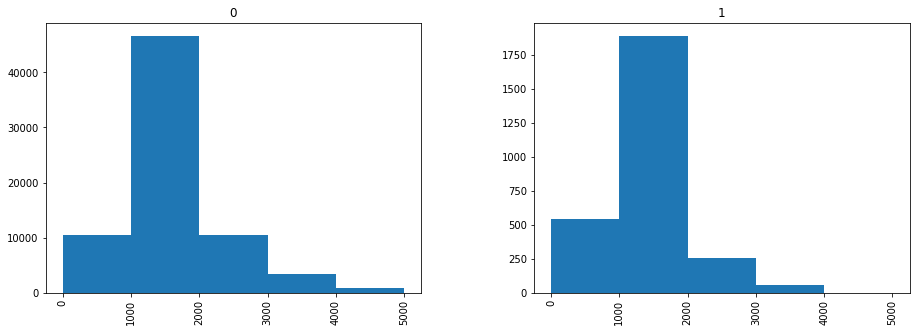

In [19]:
df.hist(column='square_footage', by='audantic_target', bins=5, range=(0, 5000), figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca6a3efc50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca6a2f0400>], dtype=object)

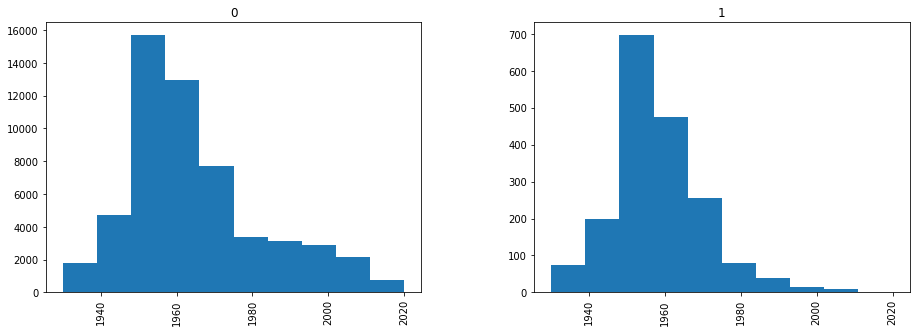

In [20]:
df.hist(column='year_built', by='audantic_target', bins=10, range=(1930, 2020), figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca6a2774e0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca69e8c198>], dtype=object)

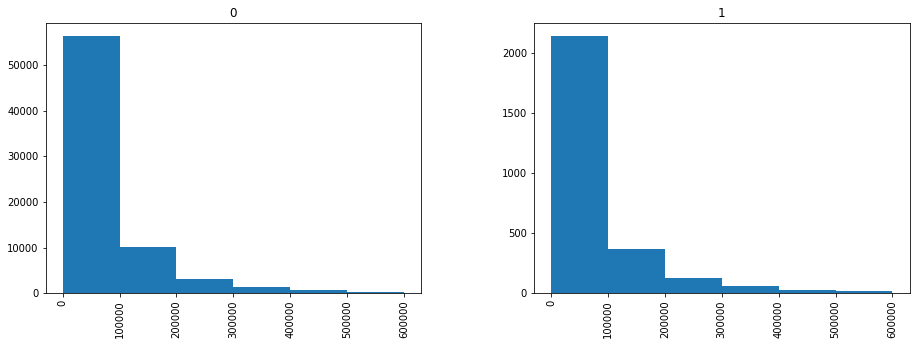

In [21]:
df.hist(column='equity', by='audantic_target', bins=6, range=(0, 600000), figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca69e26da0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca69d56898>], dtype=object)

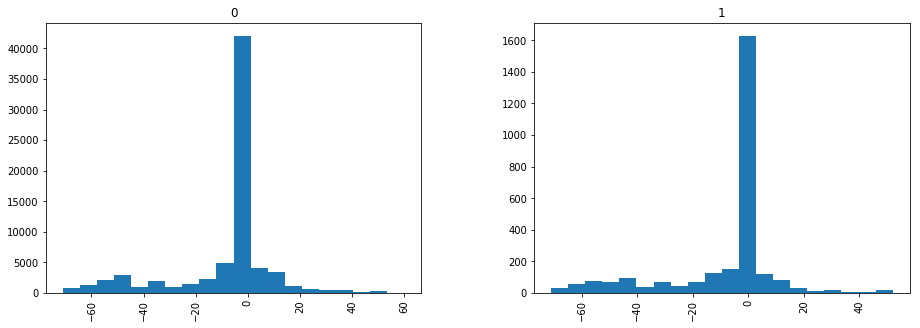

In [22]:
df.hist(column='mosaic_diff', by='audantic_target', bins=20, figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca69cb9898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca68f21e80>], dtype=object)

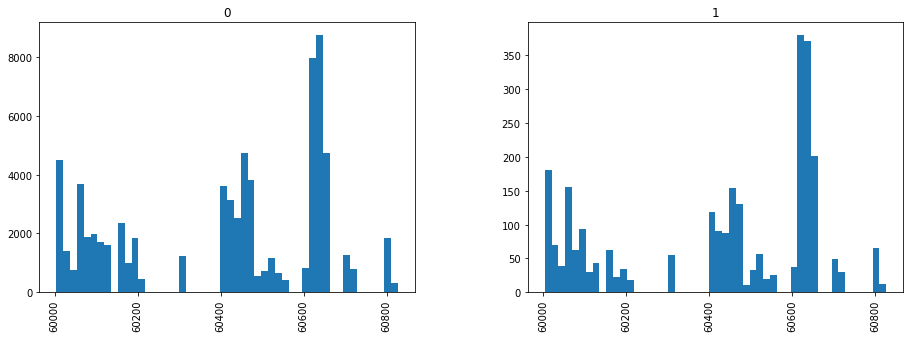

In [23]:
df.hist(column='zipcode', by='audantic_target', bins=50, figsize=(15,5))

### Preliminary observations from the histograms above
1. Larger proportion of < 1000 sqft homes in audantic_target =1 vs =0
2. Smaller proportion of newer homes in audantic_target =1 vs =0
3. Distribution of equity look roughly similar
4. Distribution of mosiac_diff look roughly similar
5. Distribution of zipcodes look roughly similar

## Calculated Metrics

### 1. estimated_value - sale_amount

In [24]:
df['estimated_vs_sale']=df['estimated_value']-df['sale_amount']

In [25]:
df.groupby('audantic_target').mean().round().filter(items=['estimated_vs_sale']).T

audantic_target,0,1
estimated_vs_sale,13674.0,75795.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca68ee5048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca68c27320>], dtype=object)

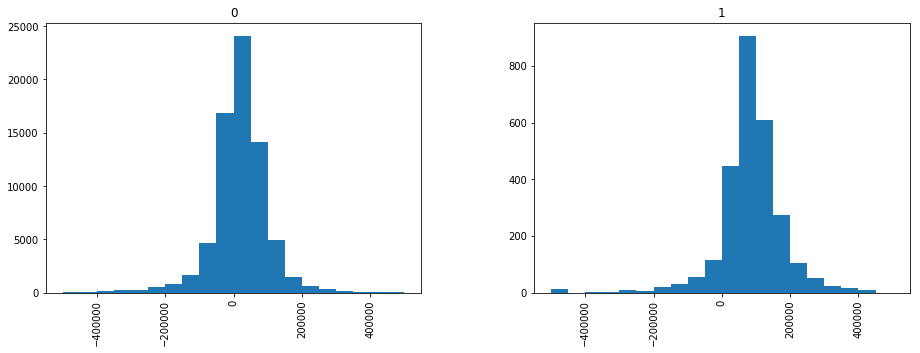

In [26]:
df.hist(column='estimated_vs_sale', by='audantic_target', bins=20, range=(-500000, 500000), figsize=(15,5))

### The average difference between estimated_value and sale_amount is greater for audantic_target =1 than =0

### 2. sale_amount / square_footage

In [27]:
df['valid_square_footage'] = df[df['square_footage']>0].filter(items=['square_footage'])

In [28]:
df['value_per_sqft']=df['sale_amount']/df['valid_square_footage']

In [29]:
df.groupby('audantic_target').mean().round().filter(items=['value_per_sqft']).T

audantic_target,0,1
value_per_sqft,179.0,153.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca68ad3390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fca68a63cc0>], dtype=object)

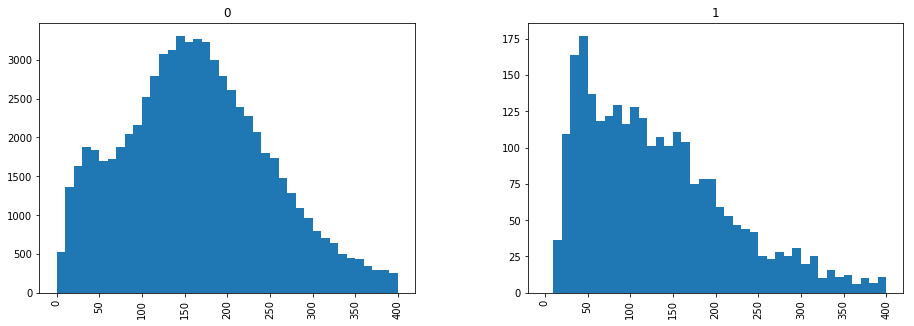

In [30]:
df.hist(column='value_per_sqft', by='audantic_target', bins=40, range=(0, 400), figsize=(15,5))

### The average value_per_sqft is lower for audantic_target =1 than =0

## Significance Testing

### Testing for statistically significant differences between audantic_target=1 vs =0 using a two-sided t test

In [31]:
import scipy

In [32]:
from scipy import stats

In [33]:
# the two metrics we will test are the calculated ones from above (estimated_value - sale_amount and sale_amount / square_footage)
testing_cols = ['estimated_vs_sale', 'value_per_sqft']

In [34]:
for column in df[testing_cols]:
    array0 = (df[df['audantic_target'] == 0].filter(items=[column])).values
    array1 = (df[df['audantic_target'] == 1].filter(items=[column])).values
    result = scipy.stats.ttest_ind(array0, array1, equal_var=False, nan_policy='omit')
    print(column+" T-Test Result:"+str(result.pvalue))

estimated_vs_sale T-Test Result:[  1.18541307e-110]
value_per_sqft T-Test Result:2.2496496938169648e-23


### For both metrics, the p-value is < 0.01 (have a statistically signficant result at 99% confidence level). 
### We can say the difference in sample means of metric 1(estimated value - sale amount) and metric 2(sale amount / square footage) between audantic_target=0 and audantic_target=1 is statistically signficant and we can reject our null hypothesis (that there is no difference in the sample means between the two groups)
### From this I would infer that a greater difference between estimated value and sale amount, as well as a lower sale value per square footage increases the likelihood a property falls into category audantic_target=1

## Other Qualitative Variables

In [35]:
df.groupby(df['transfer_type'].str.lower()).agg({'audantic_target': ['sum','count','mean']})

audantic_target                 
                                         sum  count      mean
transfer_type                                                
construction sale                        441   1560  0.282692
subdivision related transfer               0   1268  0.000000
transfer                                2302  70526  0.032640
transfer to lender                         0   1695  0.000000

### Audantic Target = 1 are more likely to be construction sale

In [36]:
df.groupby('document_type').agg({'audantic_target': ['sum','count','mean']})

audantic_target                 
                                                sum  count      mean
document_type                                                       
Deed in Lieu of Foreclosure                       0      5  0.000000
Dual Purpose Document                             1      9  0.111111
Grant Deed                                     1200  24315  0.049352
Loan 1 (Only) Is A Reverse Mortgage               0      1  0.000000
Trustees Deed                                     0   1724  0.000000
Warranty Deed                                  1539  48987  0.031416

In [37]:
df.groupby('distress_circumstance').agg({'audantic_target': ['sum','count','mean']})

audantic_target           
                                                              sum count mean
distress_circumstance                                                       
Loan Record                                                     0    10    0
Property sold by lender / REO Out                               0  6639    0
REO RECORD DERIVED FROM KEYWORDS                                0    30    0
REO RECORD WITH DOC TYPE='U'                                    0     8    0
REO Record derived from Keywords                                0    12    0
REO Record with Doc Type='U'                                    0     2    0
REO transfer to Guarantor                                       0     1    0
SALE RECORD - OWNERSHIP TRANSFER                                0     7    0
Sale Record -  REO Liquidation                                  0  1713    0
Sale Record - Foreclosure Auction                               0   305    0
Sale Record - Inferred Short Sale                               0  1272    0
Sale Record - Ownership Transfer                                0     2    0
Short Sale                                                      0  5419    0
Sold at mortgage foreclosure auction to 3rd party               0  1706    0

### Observations:
1. Larger proportion of "construction sale" transfer types in audantic_target =1 vs =0
2. 'distress_circumstance' is NaN for all 'audantic_target' = 1 rows but overall, 87% of values for 'distress_circumstance' are NaN (unclear if in this context this means there was NO distress circumstance or if data is actually missing) 